# Buckling Lab Code ᕕ( ᐛ )ᕗ

#### Define Material Properties and Dimensions

In [5]:
from math import pi

#Aluminum Properties
E_Al = 70e3 #MPa
sy_Al = 270 #MPa
nu_Al = 0.33

#Steel Properties
E_St = 200e3 #MPa
sy_St = 330 #MPa
nu_St = 0.31

#Bar Properties
k = 0.5
r = 0.0063/2 #m
A = pi*r**2 #m^2, cross sectional area
I = pi*r**4/4 #m^4, 2nd moment of area

#### Determine Theoretical Buckling Loads

In [6]:
import numpy as np
#Create a linear space with lengths from 1 mm to 1 m
L = np.linspace(0.001,1.0,1000)
S = (A*L**2/I)**0.5 #slenderness

#Euler Buckling Limit
scr_Al = pi**2*E_Al/(k*S)**2 #MPa
scr_St = pi**2*E_St/(k*S)**2 #MPa

#Johnson parabola
scr_J_Al = sy_Al - (k*S)**2/E_Al*(sy_Al/2/pi)**2 #MPa
scr_J_St = sy_St - (k*S)**2/E_St*(sy_St/2/pi)**2 #MPa

#Buckling transition slenderness
Str_Al = 0 #CALCULATE EULER BUCKLING TRANSITION SLENDERNESS FOR ALUMINUM
Str_St = 0 #CALCULATE EULER BUCKLING TRANSITION SLENDERNESS FOR STEEL

#Johnson parabola transition slenderness
Str_J_Al = 0 #CALCULATE JOHNSON PARABOLA TRANSITION SLENDERNESS FOR ALUMINUM
Str_J_St = 0 #CALCULATE JOHNSON PARABOLA TRANSITION SLENDERNESS FOR sTEEL

#### Input Experimental Data

In [7]:
#YOU WILL NEED TO INPUT YOUR DATA HERE
#Calculate Dimensions and Slenderness of Samples
L_Al = np.array([]) #INPUT EXPERIMENTAL LENGTH
L_St = np.array([]) #INPUT EXPERIMENTAL LENGTH
S_Al = [] #CALCULATE SLENDERNESS FROM LENGTH
S_St = [] #CALCULATE SLENDERNESS FROM LENGTH

#Input Peak Stress from Experiments
P_Al = np.array([]) #INPUT EXPERIMENTAL PEAK LOAD
P_St = np.array([]) #INPUT EXPERIMENTAL PEAK LOAD
sigma_Al = [] #CALCULATE PEAK STRESS
sigma_St = [] #CALCULATE PEAK STRESS

#### Plot the Results

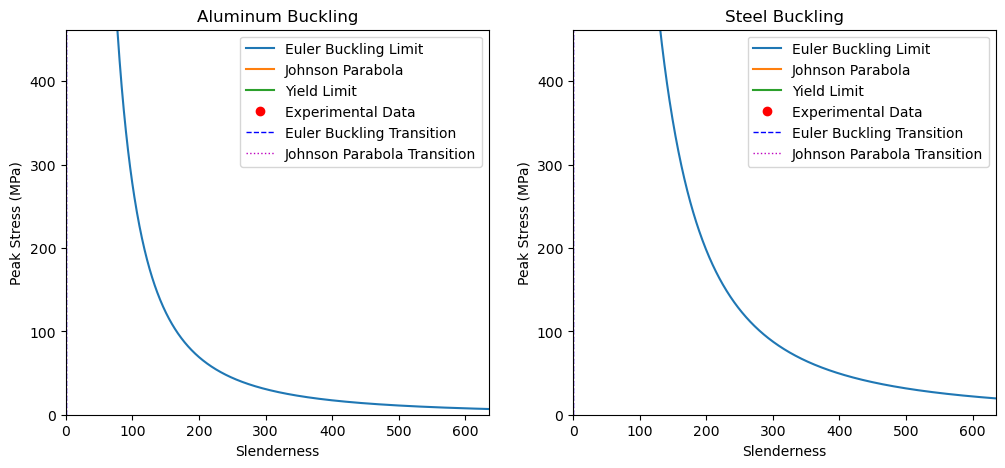

In [8]:
import matplotlib.pyplot as plt

fig,(ax1,ax2) = plt.subplots(1,2,figsize=(12,5))

#Plot Aluminum Results
ax1.plot(S[S>Str_Al], scr_Al[S>Str_Al], label='Euler Buckling Limit')
ax1.plot(S[S<Str_J_Al], scr_J_Al[S<Str_J_Al], label='Johnson Parabola')
ax1.plot([0,Str_Al], [sy_Al,sy_Al], label='Yield Limit')
ax1.plot(S_Al, sigma_Al, 'ro', label='Experimental Data')
ax1.axvline(x=Str_Al, c='b', ls='--', lw=1, label='Euler Buckling Transition')
ax1.axvline(x=Str_J_Al, c='m', ls=':', lw=1, label='Johnson Parabola Transition')
ax1.set_ylim((0,1.4*sy_St))
ax1.set_xlim((0,max(S)))
ax1.set_xlabel('Slenderness')
ax1.set_ylabel('Peak Stress (MPa)')
ax1.title.set_text('Aluminum Buckling')
ax1.legend();

#Plot Aluminum Results
ax2.plot(S[S>Str_St], scr_St[S>Str_St], label='Euler Buckling Limit')
ax2.plot(S[S<Str_J_St], scr_J_St[S<Str_J_St], label='Johnson Parabola')
ax2.plot([0,Str_St], [sy_St,sy_St], label='Yield Limit')
ax2.plot(S_St, sigma_St, 'ro', label='Experimental Data')
ax2.axvline(x=Str_St, c='b', ls='--', lw=1, label='Euler Buckling Transition')
ax2.axvline(x=Str_J_St, c='m', ls=':', lw=1, label='Johnson Parabola Transition')
ax2.set_ylim((0,1.4*sy_St))
ax2.set_xlim((0,max(S)))
ax2.set_xlabel('Slenderness')
ax2.set_ylabel('Peak Stress (MPa)')
ax2.title.set_text('Steel Buckling')
ax2.legend();